In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt



In [4]:
data = np.load("./data-2013-2017-observed-filtered.npy").item()

In [5]:
selected_appliance = ['use', 'air1', 'refrigerator1','furnace1', 'clotheswasher1', 'dishwasher1',  'microwave1']

In [6]:
def create_tensor(year, data):
    raw_data = data[year]
    homeids = list(raw_data.keys())
    tensor = np.zeros((len(homeids), 7, 12))
    for idx, hid in enumerate(homeids):
        for i, app in enumerate(selected_appliance):
            tensor[idx][i] = raw_data[hid][app].values.T
    return tensor

In [7]:
all_tensor = {}
for year in [2013, 2014, 2015, 2016, 2017]:
    all_tensor[year] = create_tensor(year, data)

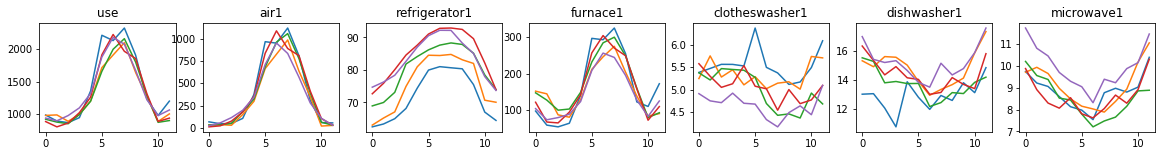

In [8]:
fig, axes = plt.subplots(ncols=7, nrows = 1, figsize=(20, 2))
ax = axes.flatten()

for i, app in enumerate(selected_appliance):
    
    for year in range(2013, 2018):
        pd.Series(all_tensor[year].mean(axis=0)[i]).plot(ax=ax[i])
    ax[i].set_title(app)

In [ ]:
fig, axes = plt.subplots(ncols=7, nrows = 5, figsize=(20, 15))
ax = axes.flatten()
a=0

for year in range(2013, 2018):
    for i, app in enumerate(selected_appliance):
        for j in range(all_tensor[year].shape[0]):
            pd.DataFrame(all_tensor[year][j][i]).plot(ax=ax[a])
        a += 1

KeyboardInterrupt: 

In [9]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [10]:
for year in range(2013, 2018):
    db = DBSCAN(eps=0.3, min_samples=10, metric='cosine', algorithm='brute').fit(all_tensor[year][:, 6])
    print(year)
    print(db.labels_)
    try:
        print(list(db.labels_).index(-1))
    except:
        continue

2013
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2014
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2015
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2016
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2017
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [11]:
list(data[2014].keys())

[3456,
 7940,
 4998,
 4874,
 3723,
 2575,
 1169,
 5395,
 4373,
 2974,
 2335,
 4000,
 545,
 4514,
 6692,
 4135,
 5545,
 7850,
 8236,
 4957,
 7863,
 9912,
 6101,
 7901,
 5568,
 2242,
 3273,
 8142,
 5972,
 6990,
 6614,
 5209,
 93,
 3039,
 1632,
 2018,
 1507,
 8292,
 9701,
 871,
 1642,
 3367,
 2156,
 8046,
 7536,
 114,
 9982,
 4342,
 3192,
 8669,
 8956,
 2814,
 3967]

In [398]:
year = 2014
pd.DataFrame(all_tensor[year][:, 4]).max(axis=1).nsmallest(2)

9     1.516980
22    1.554807
dtype: float64

In [25]:
# pd.DataFrame(all_tensor[2014][:-5])
pd.DataFrame(all_tensor[2014][48])

,0,1,2,3,4,5,6,7,8,9,10,11
0,1523.459473,1210.153564,917.935669,738.229553,1163.200684,1773.729248,1471.086548,1468.515381,1201.307373,1103.011963,1123.553467,1203.983521
1,607.026428,532.580811,296.168365,68.068283,497.918488,1025.229858,770.814026,776.626648,559.084351,307.689514,225.707993,290.332825
2,54.099583,54.160393,56.938904,67.122459,67.482216,72.127502,69.347626,70.262657,70.267937,73.961449,61.268314,58.338284
3,304.736145,126.359474,54.770439,15.563750,89.948837,157.715698,125.963982,119.736000,96.902962,60.959789,156.232895,133.279922
4,6.140856,5.062574,4.673518,7.617455,8.968683,6.517153,20.423052,17.591421,20.193218,27.481743,20.705734,20.726748
5,14.679722,14.715005,22.157997,25.098099,19.955645,18.104467,20.098387,12.707572,23.221390,32.192810,28.853064,22.698679
6,8.407129,8.507416,11.216195,11.828674,8.576300,9.553635,10.468996,8.810798,10.667176,9.962433,11.091783,9.317921


In [18]:
data[2014][4342]

,use,air1,clotheswasher1,dishwasher1,furnace1,microwave1,refrigerator1
localhour,,,,,,,
2014-01,551.844177,0.022939,9.888351,0.185775,85.469154,3.832415,51.186737
2014-02,526.498962,0.015278,10.027381,0.173909,67.124580,5.599306,55.058357
2014-03,518.360596,7.457570,10.626707,0.217588,38.570240,0.819789,55.863094
2014-04,672.145813,166.327393,9.973397,0.561904,47.061897,4.154476,64.474022
2014-05,920.459167,339.660583,10.256250,1.002151,79.008621,2.384185,70.728630
2014-06,1235.078247,663.006226,9.302199,1.695301,133.957520,2.838449,69.118774
2014-07,1726.896851,1058.287476,8.841599,2.608109,190.678421,3.224821,74.945091
2014-08,1892.523315,1237.058105,9.911716,2.938687,213.214020,4.495878,71.061874
2014-09,1261.208130,675.088013,10.073773,1.735347,133.229218,6.225255,72.382614


In [31]:
year=2014
print(list(data[year].keys())[48])
data[year][list(data[year].keys())[48]]

8669


,use,air1,clotheswasher1,dishwasher1,furnace1,microwave1,refrigerator1
localhour,,,,,,,
2014-01,1970.369263,560.683838,3.124843,17.678585,271.458679,2.907818,68.866508
2014-02,2030.646729,424.295746,4.369866,20.100819,306.715668,2.402976,72.813515
2014-03,1441.745361,35.765587,2.935175,14.992834,235.471985,1.428077,71.330147
2014-04,1400.760498,267.275330,2.738264,14.563564,67.940163,1.943634,81.418747
2014-05,1677.200806,521.336365,3.148969,13.288396,123.755104,1.556205,89.584831
2014-06,2210.381592,1108.961426,3.707199,11.216921,234.072220,0.985162,91.592430
2014-07,2575.456299,1432.582642,2.803853,12.718616,280.171356,1.707460,99.267784
2014-08,2790.311279,1612.682983,2.869310,12.874597,308.748901,1.519422,99.024040
2014-09,2411.351562,1199.623413,2.702037,12.323287,249.608124,1.360509,99.317062


In [32]:
data[year].pop(8669)

,use,air1,clotheswasher1,dishwasher1,furnace1,microwave1,refrigerator1
localhour,,,,,,,
2014-01,1970.369263,560.683838,3.124843,17.678585,271.458679,2.907818,68.866508
2014-02,2030.646729,424.295746,4.369866,20.100819,306.715668,2.402976,72.813515
2014-03,1441.745361,35.765587,2.935175,14.992834,235.471985,1.428077,71.330147
2014-04,1400.760498,267.275330,2.738264,14.563564,67.940163,1.943634,81.418747
2014-05,1677.200806,521.336365,3.148969,13.288396,123.755104,1.556205,89.584831
2014-06,2210.381592,1108.961426,3.707199,11.216921,234.072220,0.985162,91.592430
2014-07,2575.456299,1432.582642,2.803853,12.718616,280.171356,1.707460,99.267784
2014-08,2790.311279,1612.682983,2.869310,12.874597,308.748901,1.519422,99.024040
2014-09,2411.351562,1199.623413,2.702037,12.323287,249.608124,1.360509,99.317062


In [34]:
np.save("./data-2013-2017-observed-filter-2.npy", data)

In [33]:
c = 0
for i in range(2013, 2018):
    print(i, len(data[i].keys()))
    c+=len(data[i].keys())
print(c)

2013 19
2014 51
2015 93
2016 73
2017 44
280


In [421]:
error = {}
for year1 in range(2013, 2018):
    error[year1] = {}
    for year2  in range(2013, 2018):
        if year1 != year2:
#             error[year1][year2] = {}
            filename = "../code/error-{}-{}.npy".format(year1, year2)
            error[year1][year2] = np.load(filename, encoding='latin1').item()

In [422]:
pvalue = {}
for appliance in selected_appliance[1:]:
    pvalue[appliance] = {}
    for year1 in range(2013, 2018):
        pvalue[appliance][year1] = {}
        for year2  in range(2013, 2018):
            if year1 != year2:
                pvalue[appliance][year1][year2] = {}
                
from scipy import stats
for year1 in range(2013, 2018):
    for year2  in range(2013, 2018):
        if year1 != year2:
            for appliance in selected_appliance[1:]:
                
                statistic, pvalue[appliance][year1][year2] = stats.ttest_rel(pd.Series(error[year1][year2]['same'][appliance]).values, pd.Series(error[year1][year2]['diff'][appliance]).values )
                print(year1, year2, appliance)

2013 2014 air1
2013 2014 refrigerator1
2013 2014 furnace1
2013 2014 clotheswasher1
2013 2014 dishwasher1
2013 2014 microwave1
2013 2015 air1
2013 2015 refrigerator1
2013 2015 furnace1
2013 2015 clotheswasher1
2013 2015 dishwasher1
2013 2015 microwave1
2013 2016 air1
2013 2016 refrigerator1
2013 2016 furnace1
2013 2016 clotheswasher1
2013 2016 dishwasher1
2013 2016 microwave1
2013 2017 air1
2013 2017 refrigerator1
2013 2017 furnace1
2013 2017 clotheswasher1
2013 2017 dishwasher1
2013 2017 microwave1
2014 2013 air1
2014 2013 refrigerator1
2014 2013 furnace1
2014 2013 clotheswasher1
2014 2013 dishwasher1
2014 2013 microwave1
2014 2015 air1
2014 2015 refrigerator1
2014 2015 furnace1
2014 2015 clotheswasher1
2014 2015 dishwasher1
2014 2015 microwave1
2014 2016 air1
2014 2016 refrigerator1
2014 2016 furnace1
2014 2016 clotheswasher1
2014 2016 dishwasher1
2014 2016 microwave1
2014 2017 air1
2014 2017 refrigerator1
2014 2017 furnace1
2014 2017 clotheswasher1
2014 2017 dishwasher1
2014 2017 mic

In [425]:
pd.DataFrame(pvalue['microwave1'])

,2013,2014,2015,2016,2017
2013,NaN,0.000001,0.003130,0.000002,5.260586e-10
2014,8.126393e-07,NaN,0.065734,0.063394,5.161445e-01
2015,5.590792e-04,0.000150,NaN,0.260697,4.906156e-07
2016,6.221561e-05,0.000382,0.881941,NaN,1.609739e-05
2017,2.096843e-11,0.638474,0.000059,0.000027,NaN
